In [1]:
import pandas as pd

# Load your trimmed CSV
df = pd.read_csv('flight_delay_1M.csv')

# Preview first 5 rows
df.head()


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [2]:
df.isnull().sum()

FL_DATE                         0
AIRLINE                         0
AIRLINE_DOT                     0
AIRLINE_CODE                    0
DOT_CODE                        0
FL_NUMBER                       0
ORIGIN                          0
ORIGIN_CITY                     0
DEST                            0
DEST_CITY                       0
CRS_DEP_TIME                    0
DEP_TIME                    25839
DEP_DELAY                   25847
TAXI_OUT                    26240
WHEELS_OFF                  26240
WHEELS_ON                   26616
TAXI_IN                     26616
CRS_ARR_TIME                    0
ARR_TIME                    26616
ARR_DELAY                   28660
CANCELLED                       0
CANCELLATION_CODE          973645
DIVERTED                        0
CRS_ELAPSED_TIME                7
ELAPSED_TIME                28660
AIR_TIME                    28660
DISTANCE                        0
DELAY_DUE_CARRIER          821483
DELAY_DUE_WEATHER          821483
DELAY_DUE_NAS 

In [3]:
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].fillna('None')

# 2. Fill all 'DELAY_DUE_' columns with 0
delay_cols = [col for col in df.columns if 'DELAY_DUE' in col]
df[delay_cols] = df[delay_cols].fillna(0)

# 3. Drop rows with critical missing flight timing info
timing_cols = [
    'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
    'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'CRS_ELAPSED_TIME'
]
df.dropna(subset=timing_cols, inplace=True)

In [4]:
print(df.isnull().sum().sort_values(ascending=False))

FL_DATE                    0
AIRLINE                    0
DELAY_DUE_SECURITY         0
DELAY_DUE_NAS              0
DELAY_DUE_WEATHER          0
DELAY_DUE_CARRIER          0
DISTANCE                   0
AIR_TIME                   0
ELAPSED_TIME               0
CRS_ELAPSED_TIME           0
DIVERTED                   0
CANCELLATION_CODE          0
CANCELLED                  0
ARR_DELAY                  0
ARR_TIME                   0
CRS_ARR_TIME               0
TAXI_IN                    0
WHEELS_ON                  0
WHEELS_OFF                 0
TAXI_OUT                   0
DEP_DELAY                  0
DEP_TIME                   0
CRS_DEP_TIME               0
DEST_CITY                  0
DEST                       0
ORIGIN_CITY                0
ORIGIN                     0
FL_NUMBER                  0
DOT_CODE                   0
AIRLINE_CODE               0
AIRLINE_DOT                0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64


In [5]:
df['FL_DATE'].dtype


dtype('O')

In [7]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

In [8]:
df['FL_DATE'].isna().sum()

0

In [9]:
# Check how many will be removed first
print("Cancelled:", df[df['CANCELLED'] == 1].shape[0])
print("Diverted:", df[df['DIVERTED'] == 1].shape[0])

Cancelled: 0
Diverted: 0


In [10]:
df.dtypes

FL_DATE                    datetime64[ns]
AIRLINE                            object
AIRLINE_DOT                        object
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                        object
DEST                               object
DEST_CITY                          object
CRS_DEP_TIME                        int64
DEP_TIME                          float64
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                        float64
WHEELS_ON                         float64
TAXI_IN                           float64
CRS_ARR_TIME                        int64
ARR_TIME                          float64
ARR_DELAY                         float64
CANCELLED                         float64
CANCELLATION_CODE                  object
DIVERTED                          float64
CRS_ELAPSED_TIME                  

In [12]:
df['DEP_DELAY']

0          -4.0
1          -6.0
2           6.0
3          -1.0
4          -2.0
          ...  
999994    109.0
999995     -8.0
999997     15.0
999998     90.0
999999     -4.0
Name: DEP_DELAY, Length: 971340, dtype: float64

In [13]:
df.to_csv("cleaned_flight_delay_1M.csv", index=False)

In [2]:
!pip install matplotlib seaborn

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.5 MB 4.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.5 MB 6.4 MB/s eta 0:00:01
   ------------------------- -------------- 4.7/7.5 MB 8.9 MB/s eta 0:00:01
   ------------------------------------- -- 7.1/7.5 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------------------- ------- 2.1/2.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 9.2 MB/s eta 0:00:00


In [1]:
# EDA and Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Load cleaned dataset
df = pd.read_csv("cleaned_flight_delay_1M.csv")

# Display shape and sample
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (971340, 32)


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Column-wise overview
print("Columns in dataset:")
print(df.columns.tolist())

# Info on data types and non-null values
print("\nDataset Info:")
df.info()

# Basic statistics (for numerical columns)
print("\nSummary Statistics:")
df.describe()


Columns in dataset:
['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971340 entries, 0 to 971339
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  971340 non-null  object 
 1   AIRLINE                  971340 non-null  object 
 2   AIRLINE_DOT              971340 non-null  object 
 3   AIRLINE_CODE             971340 non-null  object 
 4   DOT_CODE                 971340 non-null  int64 

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,971340.000000,971340.000000,971340.000000,971340.00000,971340.000000,971340.000000,971340.000000,971340.000000,971340.000000,971340.000000,...,971340.0,971340.0000,971340.000000,971340.000000,971340.000000,971340.000000,971340.000000,971340.000000,971340.000000,971340.000000
mean,19976.572790,2508.345221,1326.125809,1329.65768,10.036885,16.629500,1352.346109,1462.479146,7.675843,1490.149173,...,0.0,142.3413,136.550967,112.245638,810.198947,4.511910,0.720771,2.420493,0.027342,4.668148
std,376.601561,1744.970610,485.605442,499.45473,48.649805,9.185631,501.024438,526.975133,6.257438,510.890720,...,0.0,71.6549,71.629063,69.695020,588.889494,31.830817,13.980797,15.032345,1.454297,25.695249
min,19393.000000,1.000000,1.000000,1.00000,-82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,20.0000,15.000000,8.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19790.000000,1049.000000,915.000000,916.00000,-6.000000,11.000000,931.000000,1049.000000,4.000000,1107.000000,...,0.0,90.0000,84.000000,61.000000,378.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19930.000000,2150.000000,1318.000000,1322.00000,-2.000000,14.000000,1335.000000,1501.000000,6.000000,1515.000000,...,0.0,125.0000,120.000000,95.000000,653.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20368.000000,3789.000000,1730.000000,1739.00000,6.000000,19.000000,1753.000000,1908.000000,9.000000,1918.000000,...,0.0,172.0000,167.000000,142.000000,1046.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20452.000000,9562.000000,2359.000000,2400.00000,2690.000000,184.000000,2400.000000,2400.000000,249.000000,2400.000000,...,0.0,695.0000,722.000000,667.000000,5812.000000,2685.000000,1398.000000,1468.000000,377.000000,2096.000000


In [2]:
# Check for any missing values
print("\nMissing Values Check:")
missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing if not missing.empty else "No missing values found.")



Missing Values Check:
CANCELLATION_CODE    971340
dtype: int64


In [4]:
# Check data types
print("Data Types:\n", df.dtypes)

# Unique value counts for each column (categorical insight)
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Data Types:
 FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE          float64
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_D

In [3]:
# Convert FL_DATE to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

# CANCELLATION_CODE should be a category, not float
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].astype('category')

# Convert CANCELLED and DIVERTED to integer (they're actually 0 or 1)
df['CANCELLED'] = df['CANCELLED'].fillna(0).astype(int)
df['DIVERTED'] = df['DIVERTED'].fillna(0).astype(int)

# Optional: Round and convert some float delay columns to int if appropriate (skip if you want to preserve decimal precision)
delay_cols = ['DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY']
df[delay_cols] = df[delay_cols].round().astype('Int64')


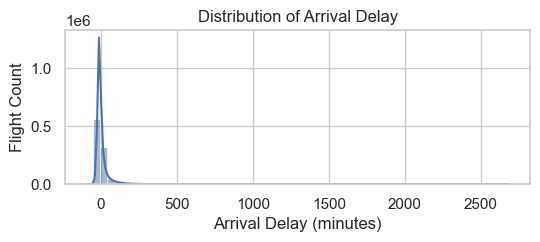

In [6]:
#  Distribution of Arrival Delay
plt.figure(figsize=(6, 2))
sns.histplot(df['ARR_DELAY'].dropna(), bins=60, kde=True)
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Flight Count")
plt.show()


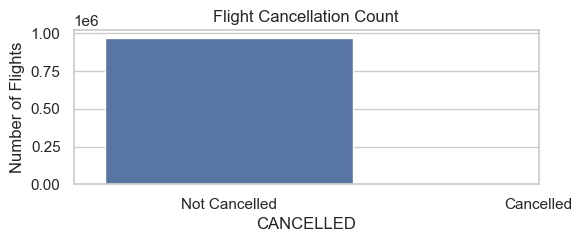

In [7]:
# Count of Cancelled Flights
plt.figure(figsize=(6, 2))
sns.countplot(x='CANCELLED', data=df)
plt.title("Flight Cancellation Count")
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.ylabel("Number of Flights")
plt.show()


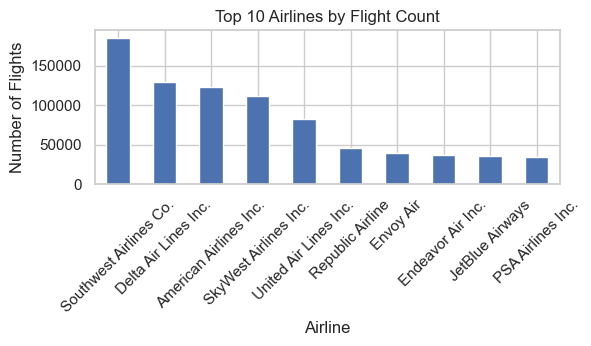

In [8]:
# Top 10 Airlines by Flight Count
plt.figure(figsize=(6, 2))
df['AIRLINE'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Airlines by Flight Count")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()


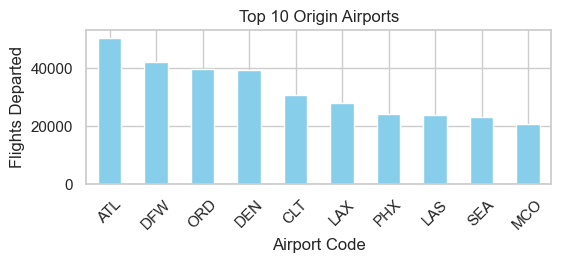

In [9]:
# Most Frequent Origin Airports

plt.figure(figsize=(6, 2))
df['ORIGIN'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Origin Airports")
plt.xlabel("Airport Code")
plt.ylabel("Flights Departed")
plt.xticks(rotation=45)
plt.show()


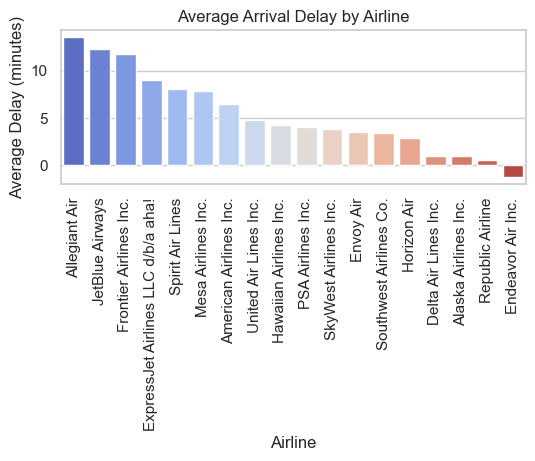

In [12]:
# Average Arrival Delay by Airline

airline_delays = df.groupby('AIRLINE')['ARR_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 2))
sns.barplot(x=airline_delays.index, y=airline_delays.values, palette='coolwarm')
plt.title("Average Arrival Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=90)
plt.show()


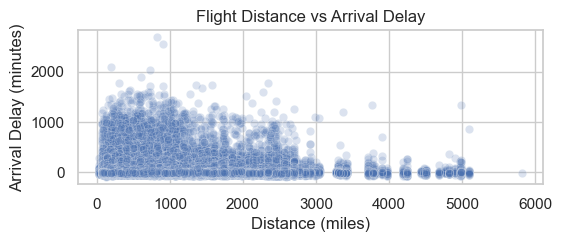

In [ ]:
# Relationship Between Flight Distance and Arrival Delay
plt.figure(figsize=(6, 2))
sns.scatterplot(x='DISTANCE', y='ARR_DELAY', data=df, alpha=0.2)
plt.title("Flight Distance vs Arrival Delay")
plt.xlabel("Distance (miles)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


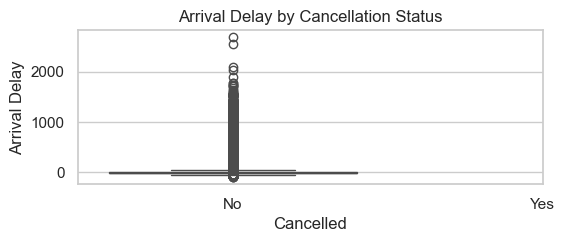

In [ ]:
#Cancellations vs Delays
plt.figure(figsize=(6, 2))
sns.boxplot(x='CANCELLED', y='ARR_DELAY', data=df)
plt.title("Arrival Delay by Cancellation Status")
plt.xlabel("Cancelled")
plt.ylabel("Arrival Delay")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


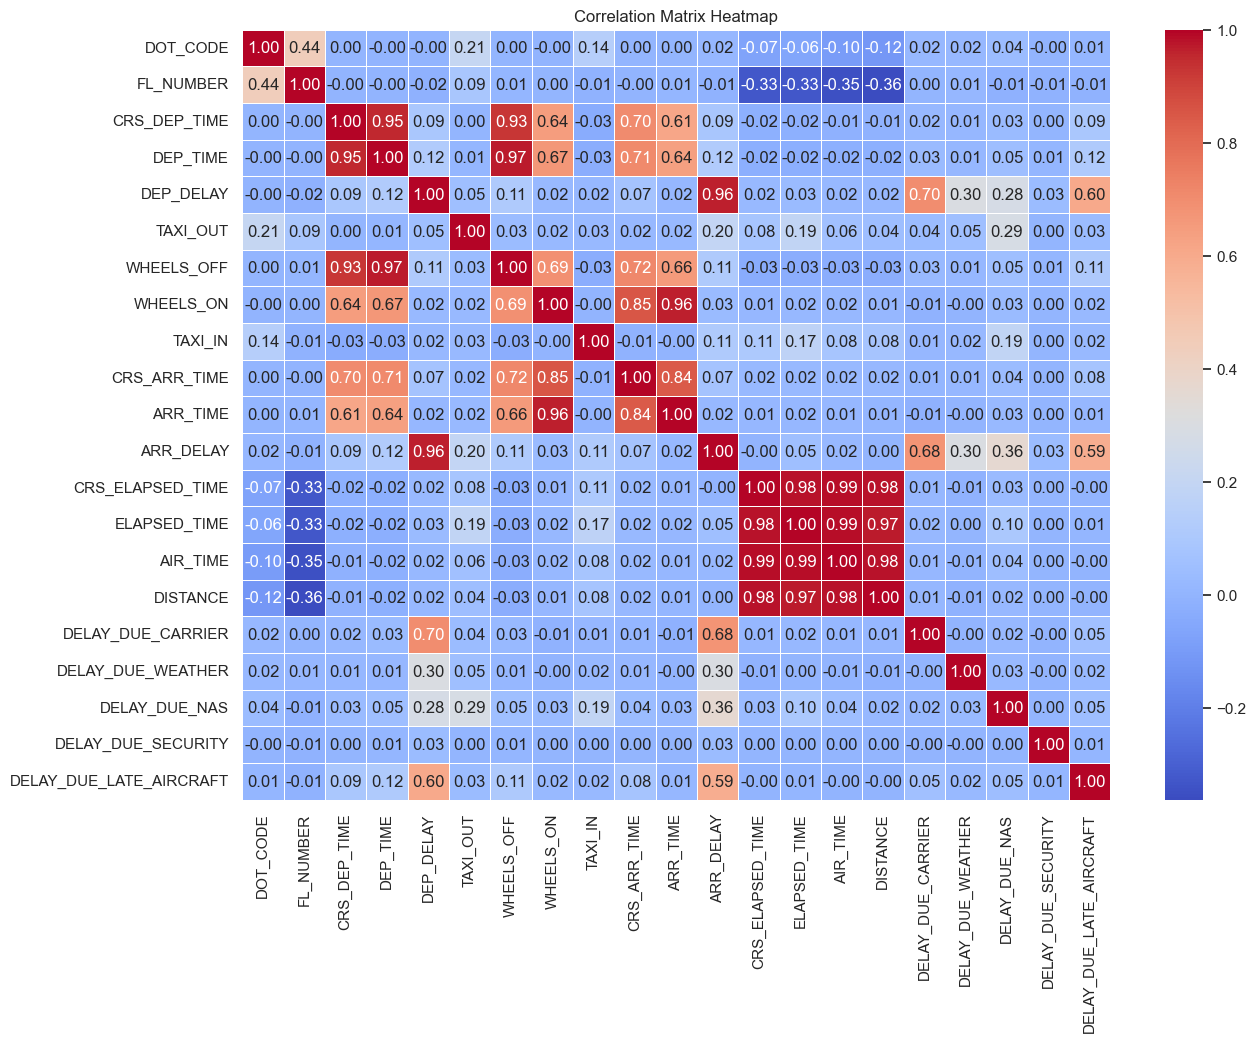

In [4]:

# Selecting only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
corr_matrix = numeric_df.corr()

# Setting up the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Title
plt.title("Correlation Matrix Heatmap")
plt.show()



In [5]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [6]:
# 1. Convert FL_DATE to datetime and extract useful parts
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')
df['FL_MONTH'] = df['FL_DATE'].dt.month
df['FL_DAY'] = df['FL_DATE'].dt.day
df['FL_DAY_OF_WEEK'] = df['FL_DATE'].dt.dayofweek

# 2. Create binary delayed column
df['DELAYED'] = (df['ARR_DELAY'] > 15).astype(int)

# 3. Convert types
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].astype('category')
df['CANCELLED'] = df['CANCELLED'].fillna(0).astype(int)
df['DIVERTED'] = df['DIVERTED'].fillna(0).astype(int)

# 4. Drop unnecessary columns
df.drop(columns=[
    'FL_DATE', 'AIRLINE_DOT', 'AIRLINE_CODE', 
    'ORIGIN_CITY', 'DEST_CITY', 
    'DEP_TIME', 'ARR_TIME', 'ARR_DELAY',
    'WHEELS_OFF', 'WHEELS_ON', 
    'CANCELLATION_CODE'
], inplace=True)


In [28]:
df

,AIRLINE,DOT_CODE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_MONTH,FL_DAY,FL_DAY_OF_WEEK,DELAYED
0,United Air Lines Inc.,19977,1562,FLL,EWR,1155,-4.0,19.0,4.0,1501,...,1065.0,0.0,0.0,0.0,0.0,0.0,1,9,2,0
1,Delta Air Lines Inc.,19790,1149,MSP,SEA,2120,-6.0,9.0,38.0,2315,...,1399.0,0.0,0.0,0.0,0.0,0.0,11,19,5,0
2,United Air Lines Inc.,19977,459,DEN,MSP,954,6.0,20.0,5.0,1252,...,680.0,0.0,0.0,0.0,0.0,0.0,7,22,4,0
3,Delta Air Lines Inc.,19790,2295,MSP,SFO,1609,-1.0,27.0,9.0,1829,...,1589.0,0.0,0.0,24.0,0.0,0.0,3,6,0,1
4,Spirit Air Lines,20416,407,MCO,DFW,1840,-2.0,15.0,14.0,2041,...,985.0,0.0,0.0,0.0,0.0,0.0,2,23,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971335,JetBlue Airways,20409,2924,MCO,DCA,1615,109.0,17.0,11.0,1830,...,759.0,25.0,0.0,0.0,0.0,83.0,1,2,0,1
971336,Delta Air Lines Inc.,19790,1050,SFO,LAX,1525,-8.0,12.0,8.0,1653,...,337.0,0.0,0.0,0.0,0.0,0.0,12,3,1,0
971337,Spirit Air Lines,20416,99,ATL,EWR,1640,15.0,11.0,14.0,1851,...,746.0,15.0,0.0,5.0,0.0,0.0,4,18,1,1
971338,Alaska Airlines Inc.,19930,1759,SFO,SEA,2100,90.0,12.0,5.0,2315,...,679.0,0.0,0.0,0.0,0.0,69.0,12,25,2,1


In [29]:
df.isnull().sum()

AIRLINE                    0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
DEST                       0
CRS_DEP_TIME               0
DEP_DELAY                  0
TAXI_OUT                   0
TAXI_IN                    0
CRS_ARR_TIME               0
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
FL_MONTH                   0
FL_DAY                     0
FL_DAY_OF_WEEK             0
DELAYED                    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['AIRLINE', 'ORIGIN', 'DEST']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:

from sklearn.model_selection import train_test_split
leakage_cols = [
    'TAXI_IN', 'CANCELLED', 'DIVERTED', 
    'ELAPSED_TIME', 'AIR_TIME',
    'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
]


In [15]:
X = df.drop('DELAYED', axis=1)
y = df['DELAYED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
df.columns.intersection(leakage_cols)


Index(['AIRLINE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'FL_MONTH', 'FL_DAY', 'FL_DAY_OF_WEEK', 'DELAYED'],
      dtype='object')


In [16]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
5

Accuracy Score: 0.9536568040027179

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    159800
           1       0.92      0.81      0.86     34468

    accuracy                           0.95    194268
   macro avg       0.94      0.90      0.92    194268
weighted avg       0.95      0.95      0.95    194268


Confusion Matrix:
 [[157489   2311]
 [  6692  27776]]


In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb

# Wrap model
xgb_clf_cv = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_clf_cv, X_train, y_train, cv=skf, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-validation scores: [0.95315767 0.95355661 0.95340188 0.95390377 0.95401315]
Mean Accuracy: 0.9536066162452789
Standard Deviation: 0.00031608087700848634


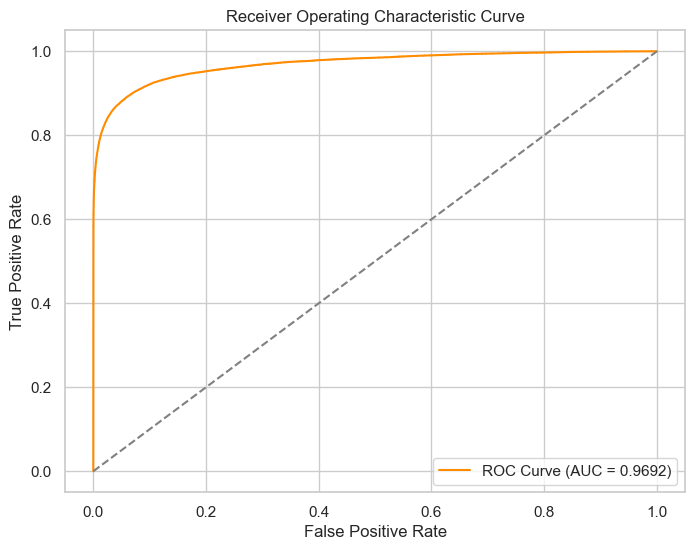

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get probability predictions
y_proba = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.grid(True)
plt.show()


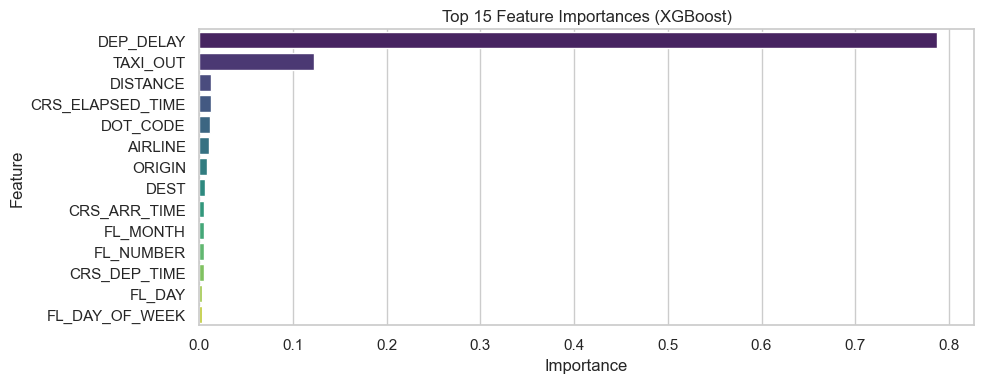

In [20]:
import seaborn as sns
import pandas as pd

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,4))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [54]:
# Assuming you have X_test and y_pred
X_test_copy = X_test.copy()
X_test_copy["Actual_Delay"] = y_test.values
X_test_copy["Predicted_Delay"] = y_pred

# Save for Power BI
X_test_copy.to_csv("flight_delay_predictions.csv", index=False)


In [55]:
import os
print(os.getcwd())

c:\Users\ayesh\FlightDelayProject


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_test and y_pred are already available
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # y_pred_proba = model.predict_proba(X_test)[:, 1]

# Save metrics into a DataFrame
import pandas as pd
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Value': [accuracy, precision, recall, f1, roc_auc]
})

# Export to CSV for Power BI
metrics_df.to_csv("model_metrics.csv", index=False)



In [24]:
extra_cols = ['TAXI_OUT', 'DEP_DELAY']
df.columns.intersection(extra_cols)

Index(['DEP_DELAY', 'TAXI_OUT'], dtype='object')

In [25]:
df.columns

Index(['AIRLINE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'FL_MONTH', 'FL_DAY', 'FL_DAY_OF_WEEK', 'DELAYED'],
      dtype='object')

In [27]:
df.drop(columns=extra_cols, inplace=True)

In [28]:
X = df.drop('DELAYED', axis=1)
y = df['DELAYED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.8235221446661313

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90    159800
           1       0.56      0.02      0.05     34468

    accuracy                           0.82    194268
   macro avg       0.69      0.51      0.47    194268
weighted avg       0.78      0.82      0.75    194268


Confusion Matrix:
 [[159175    625]
 [ 33659    809]]


In [30]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb

# Wrap model
xgb_clf_cv = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_clf_cv, X_train, y_train, cv=skf, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-validation scores: [0.82284207 0.82323457 0.8236388  0.82314978 0.82332994]
Mean Accuracy: 0.8232390311340889
Standard Deviation: 0.0002583189240031311


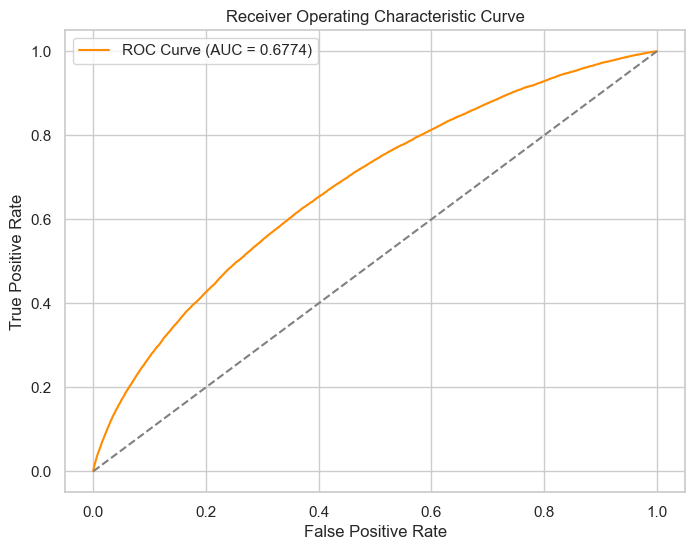

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get probability predictions
y_proba = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.grid(True)
plt.show()

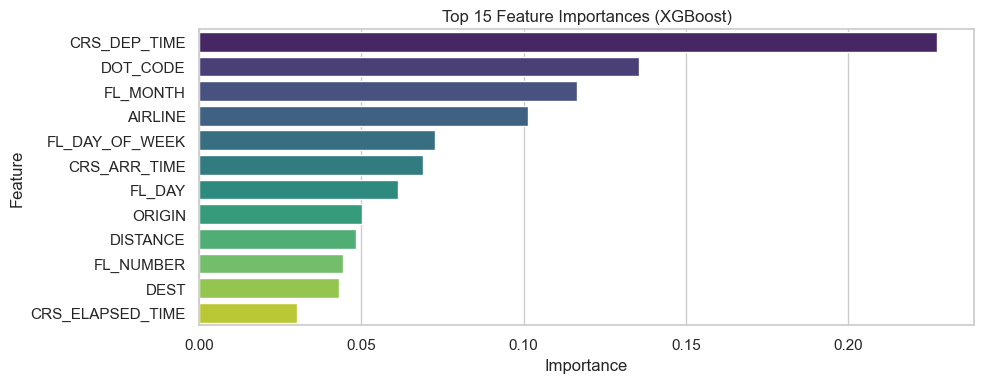

In [32]:
import seaborn as sns
import pandas as pd

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,4))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()
